# 목표 : 데이터의 기술통계 및 결측치를 확인하고 보정해보자

In [4]:
# 설치된 패키지에 대한 메타데이터 조회 
!pip show pandas

Name: pandas
Version: 1.1.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\dhl\anaconda3\lib\site-packages
Requires: python-dateutil, pytz, numpy
Required-by: xarray, statsmodels, seaborn, osmnx, mapclassify, holoviews, geopandas, datashader


In [5]:
import pandas as pd

In [6]:
# "전국어린이보호구역표준데이터" CSV 파일 로딩 
df_schoolzone = pd.read_csv('./data/전국어린이보호구역표준데이터.csv', header=0, 
                          names=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'admi_police', 'cctv_yn', 'cctv_cnt', 'road_width', 'date_data', 'admin_cd', 'admin_nm2'], 
                          usecols=['type', 'name', 'addr_road', 'addr_jibun', 'lat', 'lon', 'admin_nm', 'cctv_yn', 'cctv_cnt'],
                          dtype={'type':object, 'name':object, 'addr_road':object, 'addr_jibun':object, 'lat':float, 'lon':float, 'admin_nm':object, 'cctv_yn':object, 'cctv_cnt':object }, 
                 encoding="EUC-KR", 
                 delimiter=',' , #항목 구분자 '\t'
                 thousands = ',', #천단위 쉼표 제거   
                 index_col=None) 

In [7]:
df_schoolzone.info() #데이터프레임 기본 정보 - 행수, 컬럼 정보 등. object(string), int, float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17472 non-null  object 
 1   name        17472 non-null  object 
 2   addr_road   17421 non-null  object 
 3   addr_jibun  13815 non-null  object 
 4   lat         17468 non-null  float64
 5   lon         17468 non-null  float64
 6   admin_nm    17472 non-null  object 
 7   cctv_yn     17472 non-null  object 
 8   cctv_cnt    12766 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.2+ MB


In [8]:
df_schoolzone.head() #맨 위의 5행 정보를 보여줌. 괄호안에 건수 지정 가능. 맨 아래 5건은 .tail()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,NaN
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [9]:
# 수치형 데이터 항목에 대해 건수, 산술평균, 표준편차, 최소, 분위별 값(25%, 50%-중앙값, 75%), 최대값 요약 통계 제공
df_schoolzone.describe()

,lat,lon
count,17468.000000,17468.000000
mean,36.347662,127.628690
std,1.018121,0.868320
min,33.169167,124.661632
25%,35.553054,126.945156
50%,36.326048,127.324280
75%,37.357365,128.507033
max,38.542101,130.902800


Null 등으로 인해 문자열(object) 형식으로 인식된 CCTV 갯수(cctv_cnt) 항목에 대한 요약 통계가 궁금할 때

In [10]:
# 데이터 항목별 Null 건수 체크
df_schoolzone.isnull().sum()

type             0
name             0
addr_road       51
addr_jibun    3657
lat              4
lon              4
admin_nm         0
cctv_yn          0
cctv_cnt      4706
dtype: int64

- 도로명주소와 지번주소 중에 어떤 것을 활용하는 것이 좋을까요? 특히, 대용량의 데이터여서 지오코딩 결과 건수를 검토할 수 없다면...  
- 좌표가 없는 데이터...  
- CCTV 건수 정보가 없는 데이터     
 : 결측치 비율은?   
 : CCTV 여부(cctv_yn)은 Y인데, 건수가 없는 것은?  

In [11]:
#좌표값 없는 데이터 제거
df_schoolzone2 = df_schoolzone[ (df_schoolzone['lat'] > 0) & (df_schoolzone['lon'] > 0) ]
df_schoolzone2.info()
df_schoolzone2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17467 entries, 0 to 17471
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17467 non-null  object 
 1   name        17467 non-null  object 
 2   addr_road   17416 non-null  object 
 3   addr_jibun  13810 non-null  object 
 4   lat         17467 non-null  float64
 5   lon         17467 non-null  float64
 6   admin_nm    17467 non-null  object 
 7   cctv_yn     17467 non-null  object 
 8   cctv_cnt    12763 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1.3+ MB


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,NaN
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [12]:
#df_schoolzone2.fillna(0, inplace=True)   #null을 0으로 일괄 대체
df_schoolzone2['cctv_cnt'].fillna(0, inplace=True) 
df_schoolzone2.head()

C:\Users\dhl\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7


In [13]:
df_schoolzone2['cctv_cnt2'] = df_schoolzone2['cctv_cnt'].astype(int)  #cctv_cnt 항목을 정수형 타입으로 변환
df_schoolzone2.head()

<ipython-input-13-acd0b1c32b5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_schoolzone2['cctv_cnt2'] = df_schoolzone2['cctv_cnt'].astype(int)  #cctv_cnt 항목을 정수형 타입으로 변환


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt2
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,0,0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,7


In [14]:
df_schoolzone2.describe()

,lat,lon,cctv_cnt2
count,17467.000000,17467.000000,17467.000000
mean,36.347590,127.628665,1.891452
std,1.018106,0.868339,2.614669
min,33.169167,124.661632,0.000000
25%,35.553054,126.945156,0.000000
50%,36.326031,127.324280,1.000000
75%,37.357263,128.507118,3.000000
max,38.542101,130.902800,46.000000


In [15]:
df_schoolzone2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17467 entries, 0 to 17471
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        17467 non-null  object 
 1   name        17467 non-null  object 
 2   addr_road   17416 non-null  object 
 3   addr_jibun  13810 non-null  object 
 4   lat         17467 non-null  float64
 5   lon         17467 non-null  float64
 6   admin_nm    17467 non-null  object 
 7   cctv_yn     17467 non-null  object 
 8   cctv_cnt    17467 non-null  object 
 9   cctv_cnt2   17467 non-null  int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 1.4+ MB


In [16]:
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt2
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,0,0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,7


In [17]:
#CCTV 여부(cctv_yn)은 Y이고, 건수가 0인 데이터의 CCTV_CNT를 1로 일괄 적용. 
#np.where(조건,   조건에 맞을 때 값,    조건과 다를 때 값)
import numpy as np
df_schoolzone2['cctv_cnt'] = np.where(((df_schoolzone2['cctv_yn'].str.contains('Y')==True) & (df_schoolzone2['cctv_cnt']== 0)), 1, df_schoolzone2['cctv_cnt'])

<ipython-input-17-99b8a46c3d24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_schoolzone2['cctv_cnt'] = np.where(((df_schoolzone2['cctv_yn'].str.contains('Y')==True) & (df_schoolzone2['cctv_cnt']== 0)), 1, df_schoolzone2['cctv_cnt'])


In [18]:
df_schoolzone2.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt2
0,어린이집,베스트어린이집,경기도 오산시 외삼미로 152번길 2(외삼미동),경기도 오산시 외삼미동 158-4,37.197877,127.061423,경기도 오산시,Y,1,1
1,초등학교,낭성초등학교,충청북도 청주시 상당구 낭성면 낭성시내길 5,충청북도 청주시 상당구 낭성면 이목리 108-1,36.623674,127.601792,청주시,Y,3,3
2,초등학교,솔밭초교,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,2,2
3,유치원,솔밭초교 병설유치원,충청북도 청주시 흥덕구 대농로 42 (복대동),충청북도 청주시 흥덕구 복대동 288-9,36.641637,127.426091,청주시,Y,1,0
4,초등학교,운동초교,충청북도 청주시 상당구 목련로117번길 109,충청북도 청주시 상당구 용암동 2948,36.606536,127.512967,청주시,Y,7,7


In [19]:
df_schoolzone2.describe()

,lat,lon,cctv_cnt2
count,17467.000000,17467.000000,17467.000000
mean,36.347590,127.628665,1.891452
std,1.018106,0.868339,2.614669
min,33.169167,124.661632,0.000000
25%,35.553054,126.945156,0.000000
50%,36.326031,127.324280,1.000000
75%,37.357263,128.507118,3.000000
max,38.542101,130.902800,46.000000


In [22]:
df_schoolzone3 = df_schoolzone2[  df_schoolzone2['cctv_cnt2'] >= 46   ]
df_schoolzone3.head()

,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt2
13778,유치원,유정유치원,서울특별시 강남구 광평로34길 17,NaN,37.483007,127.094942,서울특별시 강남구청,Y,46,46


In [24]:
# CCTV 여부(cctv_yn)은'N'인데, 건수가 1 이상인 데이터 조회
df_schoolzone4 = df_schoolzone2[ (df_schoolzone2['cctv_yn'].str.contains('N')==True) & (df_schoolzone2['cctv_cnt2'] > 0 ) ]
df_schoolzone4.info()
df_schoolzone4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 2046 to 17411
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   type        28 non-null     object 
 1   name        28 non-null     object 
 2   addr_road   28 non-null     object 
 3   addr_jibun  18 non-null     object 
 4   lat         28 non-null     float64
 5   lon         28 non-null     float64
 6   admin_nm    28 non-null     object 
 7   cctv_yn     28 non-null     object 
 8   cctv_cnt    28 non-null     object 
 9   cctv_cnt2   28 non-null     int32  
dtypes: float64(2), int32(1), object(7)
memory usage: 2.3+ KB


,type,name,addr_road,addr_jibun,lat,lon,admin_nm,cctv_yn,cctv_cnt,cctv_cnt2
2046,어린이집,광주법원어린이집,광주광역시 동구 필문대로187번길 31,NaN,35.154935,126.936214,광주광역시 동구청,N,2,2
2048,어린이집,동명어린이집,광주광역시 동구 주남길 20-10,NaN,35.101502,126.941945,광주광역시 동구청,N,3,3
2847,유치원,양지,부산광역시 연제구 쌍미천로30번길 53,부산광역시 연제구 연산동 산143-7,35.177807,129.092640,부산광역시 연제구청,N,1,1
3239,어린이집,인천근로복지공단어린이집,인천광역시 서구 승학로197번길 20-10,인천광역시 서구 심곡동 342-8,37.540946,126.671463,인천서구청,N,1,1
3496,초등학교,함월초등학교,울산광역시 중구 학성1길 25 (복산동),울산광역시 중구 복산동 504,35.559012,129.329191,울산광역시 중구,N,1,1


CCTV 건수 분포를 시각화해서 보고 싶은 경우

In [25]:
#import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') #한글 폰트 적용시

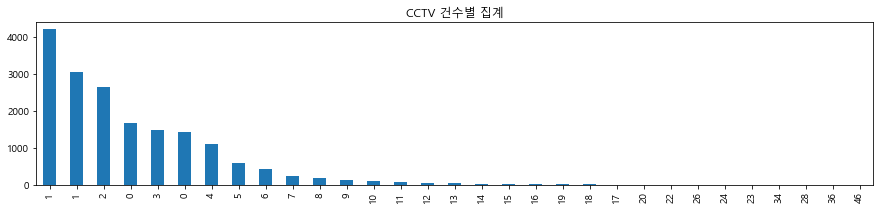

In [26]:
df_schoolzone2['cctv_cnt'].value_counts().plot(kind='bar', figsize=(15,3), title="CCTV 건수별 집계") 
plt.show()

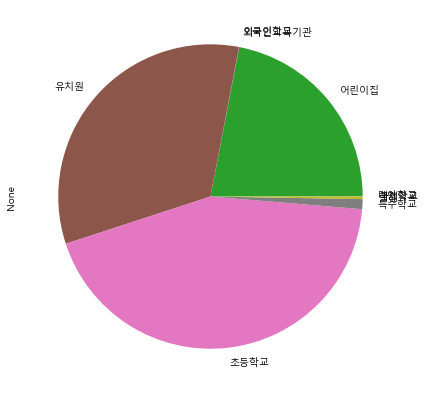

In [28]:
df_schoolzone2.groupby(['type']).size().plot(kind='pie', figsize=(7,7)) 
plt.show()

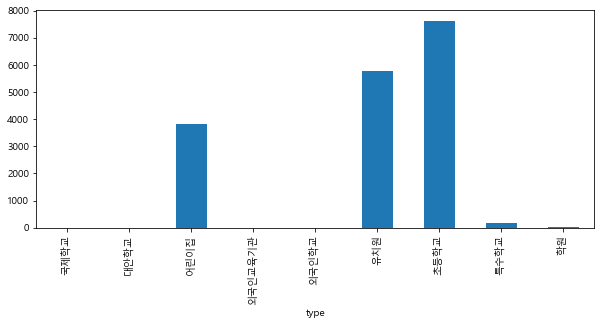

In [29]:
df_schoolzone2.groupby(['type']).size().plot(kind='bar', figsize=(10,4), stacked = False) 
plt.show()

Pandas에서 count와 size의 차이   
- count : NaN을 count하지 않음  
- size : NaN을 count함


In [30]:
import seaborn as sns

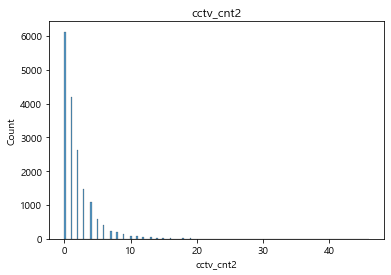

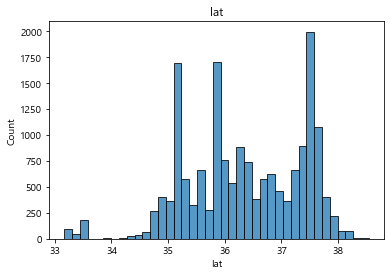

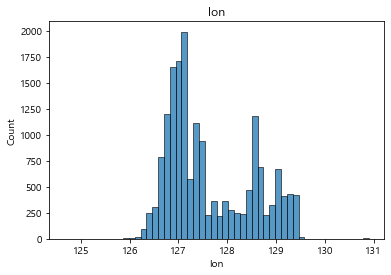

In [32]:
#Seaborn을 이용한 수치형 항목 기초 통계 시각화
for col in ['cctv_cnt2', 'lat', 'lon']:
    sns.histplot(df_schoolzone2.loc[df_schoolzone2[col].notnull(), col])
    plt.title(col)
    plt.show()

C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dhl\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


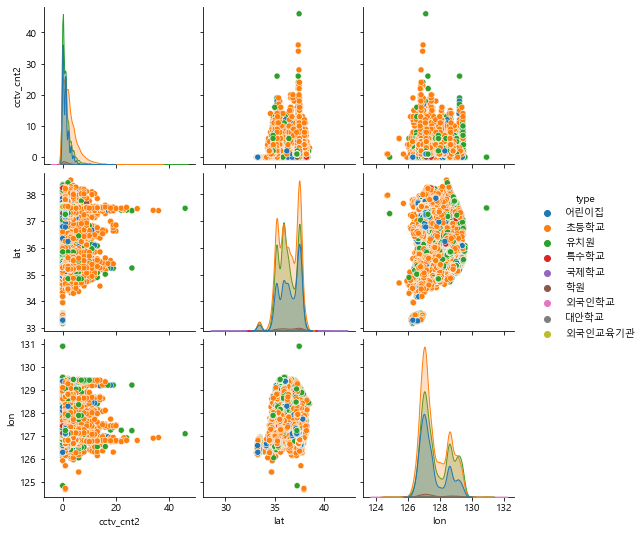

In [35]:
# type 항목에 대해 각 수치형 항목 데이터를 쌍대비교 시각화 
sns.pairplot(df_schoolzone2[['cctv_cnt2', 'lat', 'lon'] + ['type']], hue='type', 
             x_vars=['cctv_cnt2', 'lat', 'lon'], y_vars=['cctv_cnt2', 'lat', 'lon'])
plt.show()

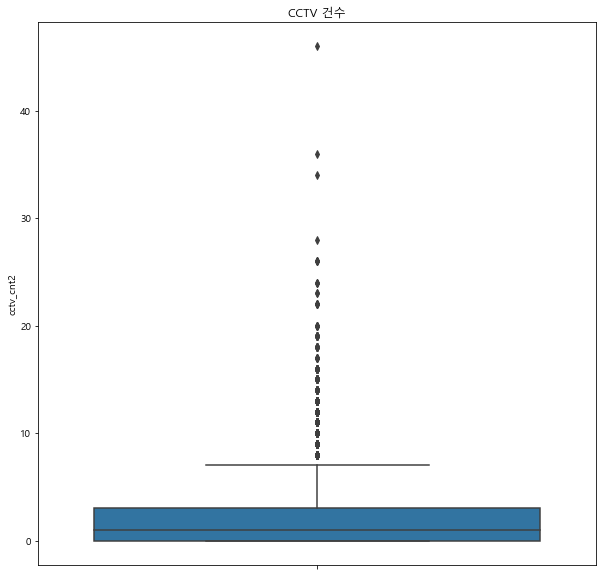

In [36]:
plt.figure(figsize=(10,10))
sns.boxplot(y='cctv_cnt2', data=df_schoolzone2)
plt.title("CCTV 건수")
plt.show()

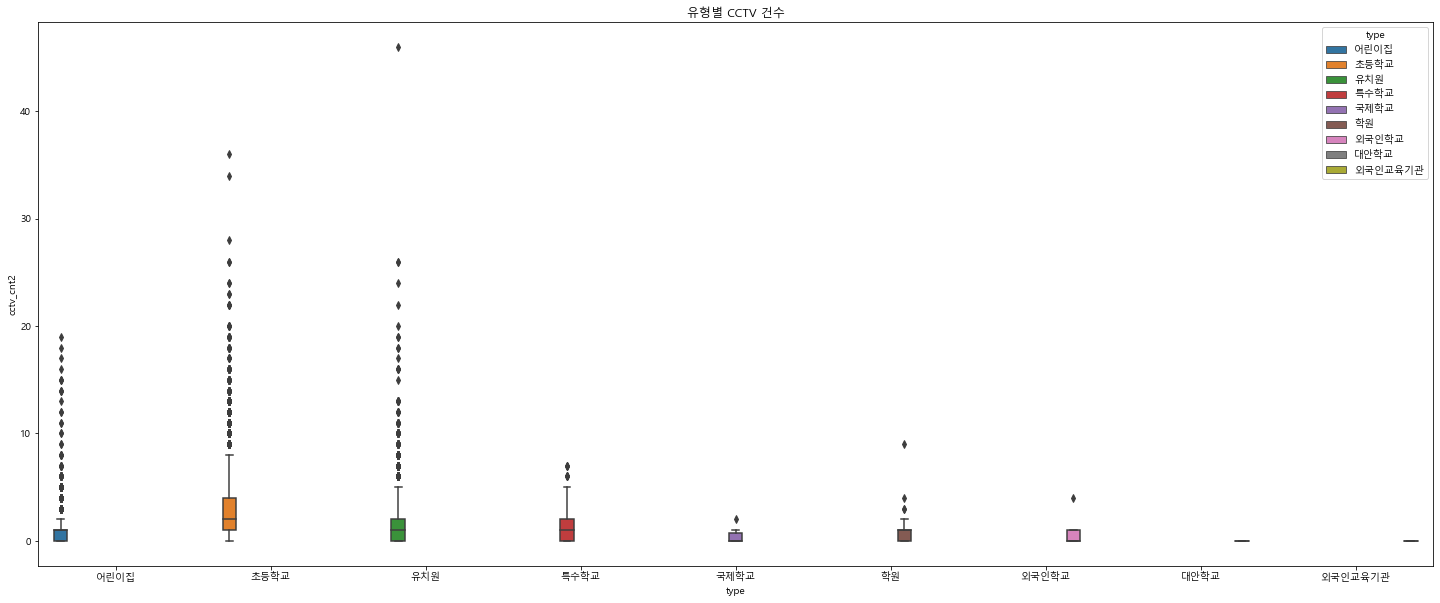

In [37]:
plt.figure(figsize=(25,10))
sns.boxplot(x='type', y='cctv_cnt2', hue='type', data=df_schoolzone2)
plt.title("유형별 CCTV 건수")
plt.show()

In [38]:
df_schoolzone5 = df_schoolzone2.groupby('type').size().reset_index()  #유형(type)별 건수 집계 항목 생성
df_schoolzone5.columns =['type','count']
df_schoolzone5['count_rank'] = df_schoolzone5['count'].rank(ascending=False, method='min') #건수 순위 항목 생성
df_schoolzone5.head(10)

,type,count,count_rank
0,국제학교,6,6.0
1,대안학교,4,7.0
2,어린이집,3827,3.0
3,외국인교육기관,1,9.0
4,외국인학교,4,7.0
5,유치원,5769,2.0
6,초등학교,7624,1.0
7,특수학교,185,4.0
8,학원,47,5.0


In [39]:
df_schoolzone6 = df_schoolzone5.sort_values(by = 'count_rank').head(10)  # 건수 순위순으로 행 재정렬
df_schoolzone6.head(10)

,type,count,count_rank
6,초등학교,7624,1.0
5,유치원,5769,2.0
2,어린이집,3827,3.0
7,특수학교,185,4.0
8,학원,47,5.0
0,국제학교,6,6.0
1,대안학교,4,7.0
4,외국인학교,4,7.0
3,외국인교육기관,1,9.0


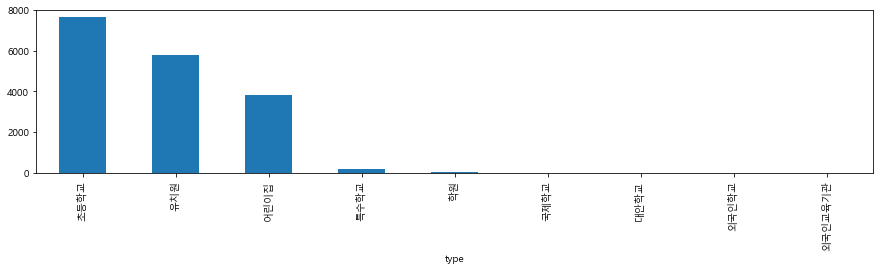

In [40]:
df_schoolzone6.index = ['초등학교', '유치원', '어린이집', '특수학교', '학원', '국제학교', '대안학교', '외국인학교', '외국인교육기관']
df_schoolzone6['count'].plot(kind='bar', figsize=(15,3)) 
plt.xlabel('type')
plt.show()